In [1]:
# packages
import sys
import numpy as np
import pandas as pd
import os
import warnings
warnings.simplefilter("ignore", FutureWarning)
warnings.simplefilter("ignore", pd.errors.SettingWithCopyWarning)
import cartopy

/scratch/nf33/public/miniconda/envs/digital_earths_env/lib/python3.12/site-packages/pyproj/network.py:59: UserWarning: pyproj unable to set PROJ database path.
  _set_context_ca_bundle_path(ca_bundle_path)


In [2]:
user='xw6141' # Username on GADI - if you are storing on /scratch/nf33/user
start_year='1990'
end_year='1999'
base_dir=f"/scratch/nf33/{user}/hk25-AusCyclones"
case_dir=f"{base_dir}/TCs_1990_1999/"
out_dir=f"/scratch/nf33/hk25-TC/ERA5"
# out_file=f"{out_dir}/stitchNodes.csv"
out_file =f"{out_dir}/stitchNodes.csv"


In [3]:
# directory for TempestExtremes
os.environ['TEMPESTEXTREMESDIR']='/scratch/nf33/tempestextremes/bin'
# link to self-written packages
sys.path.append(base_dir) # change to your directory
from utils.plotting import plot_track, calcu_track_den, lon180to360, plot_den

In [ ]:
# tropical cyclone
column_names = ["track_id", "year", "month", "day", "hour", "i", "j", "lon", "lat", "msl", "wind", "zs"]
dftc = pd.read_csv(out_file, names=column_names, skiprows=[0],low_memory=False)
dftc['time'] = pd.to_datetime(dftc[['year', 'month', 'day', 'hour']])

**Visualization 1**  
`plot_track`(df, track_color, fig_title)  
plot tracks  

Parameters:
- **df** - cyclone tracks dataframe (pandas dataframe)
- **track_color** - track color (string)
- **fig_title** - figure title (string)

In [3]:
fig = plot_track(dftc, 'red', f'TempestExtremes tropical cyclone tracks [ERA5]1980 - 2024')

NameError: name 'plot_track' is not defined

**Visualization 2**  
`calcu_track_den`(min_lon, max_lon, min_lat, min_lat, max_lat, delta, df_track, storm_id_field, grid_id_field, lonname, latname)  
calculate track density from cyclone tracks  

Parameters:
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **delta** - horizontal grid spacing
- **df_track** - cyclone tracks dataframe (pandas dataframe)
- **storm_id_field** - cyclone track ID number (string)
- **grid_id_field** - "grid_id_field" default
- **lonname** - name of longitude of cyclone track (string)
- **latname** - name of latitude of cyclone track (string)

In [2]:
dftc['lon'] = [lon180to360(lon) for lon in dftc['lon']]
dstc = calcu_track_den(0, 360, -80, 80, 1, dftc, 'track_id', 'gridid', 'lon', 'lat')

NameError: name 'dftc' is not defined

**Visualization 3**  
`plot_den`(dataArray, minlon, maxlon, minlat, maxlat, count_range, sigma, mycmap, title)  
plot track density

Parameters:
- **dataArray** - 2-D density array (xrarry data array)
- **min_lon** - minimum longitude
- **max_lon** - maximum longitude
- **min_lat** - minimum latitude
- **max_lat** - maximum latitude
- **count_range** - colorbar levels (numpy array)
- **sigma** - degree of smooth (1~5)
- **mycmap** - name of longitude of cyclone track (string)
- **title** - figure title (string)

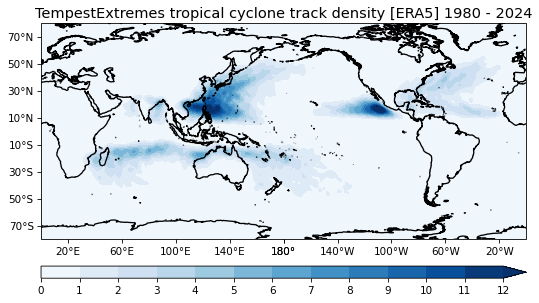

In [47]:
n_decad = 4.5
ratio_ = dstc['number']/n_decad 
fig = plot_den(ratio_, 0, 360, -80, 80, np.arange(0, 13, 1), 1, 'Blues', f'TempestExtremes tropical cyclone track density [ERA5] 1980 - 2024')

#### climatlogy

In [92]:
import seaborn as sns
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature

In [93]:
df_gen = dftc.sort_values('time').groupby('track_id',as_index=False).first()
df_min = dftc.loc[dftc.groupby('track_id')['msl'].idxmin()]
df_max = dftc.loc[dftc.groupby('track_id')['wind'].idxmax()]

In [95]:
df_max['category'] = pd.cut(df_max['wind'],
                            [0,17,32,42,49,58,70,200],
                           labels=['TD','TS','C1','C2','C3','C4','C5'])

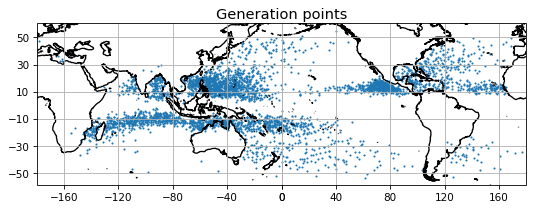

In [75]:
mapcrs = ccrs.PlateCarree(central_longitude=180)
datacrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7, 4), layout="constrained", facecolor='white', dpi=75)
ax1 = fig.add_subplot(111, projection=mapcrs)
xticks = np.arange(-180, 181, 40)
yticks = np.arange(-90+20,   91-20, 20)
ax1.set_xticks(xticks, crs=ccrs.PlateCarree())
ax1.set_yticks(yticks, crs=ccrs.PlateCarree())
# ax1.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),edgecolor='k',lw=1.25)
ax1.add_feature(cfeature.OCEAN.with_scale('50m'),facecolor='none')
ax1.grid(True)
lon = df_gen['lon']; lat = df_gen.lat.values
cf = ax1.scatter(lon, lat,transform=datacrs,s=1)
ax1.set_title('Generation points',fontsize=14, pad=5)
ax1.set_xlabel(''); ax1.set_ylabel('')
plt.show()

In [ ]:
    mapcrs = ccrs.PlateCarree(central_longitude=180)
    datacrs = ccrs.PlateCarree()
    fig = plt.figure(figsize=(7, 4), layout="constrained", facecolor='white', dpi=75)
    ax1 = fig.add_subplot(111, projection=mapcrs)
    xticks = np.arange(-180, 181, 40)
    yticks = np.arange(-90+20,   91-20, 20)
    ax1.set_xticks(xticks, crs=ccrs.PlateCarree())
    ax1.set_yticks(yticks, crs=ccrs.PlateCarree())
    ax1.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())
    ax1.xaxis.set_major_formatter(LongitudeFormatter(zero_direction_label=True))
    ax1.yaxis.set_major_formatter(LatitudeFormatter())
    ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),edgecolor='k',lw=1.25)
    ax1.add_feature(cfeature.OCEAN.with_scale('50m'),facecolor='none')
    lon = dataArray.lon.values; lat = dataArray.lat.values
    cdata, clon = add_cyclic_point(dataArray.T, lon)
    cdata_filter = gaussian_filter(cdata, sigma=sigma)
    cf = ax1.contourf(clon, lat, cdata_filter,transform=datacrs,
                      levels=count_range,cmap=mycmap,
                      extend='max')
    cb = plt.colorbar(cf,orientation='horizontal',ticks=count_range,
                     pad=0.04, aspect=40)
    ax1.set_title(title,fontsize=14, pad=5)
    ax1.set_xlabel(''); ax1.set_ylabel('')
    plt.show()

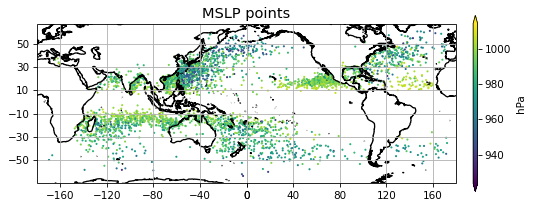

In [83]:
mapcrs = ccrs.PlateCarree(central_longitude=180)
datacrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7, 4), layout="constrained", facecolor='white', dpi=75)
ax1 = fig.add_subplot(111, projection=mapcrs)
xticks = np.arange(-180, 181, 40)
yticks = np.arange(-90+20,   91-20, 20)
ax1.set_xticks(xticks, crs=ccrs.PlateCarree())
ax1.set_yticks(yticks, crs=ccrs.PlateCarree())
# ax1.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),edgecolor='k',lw=1.25)
ax1.add_feature(cfeature.OCEAN.with_scale('50m'),facecolor='none')
ax1.grid(True)
lon = df_min['lon'];lat = df_min['lat'].values;cvalues = df_min['msl'].values/100
cf = ax1.scatter(lon, lat,c= cvalues,transform=datacrs,s=1,
                 # levels=count_range,cmap=mycmap
                )
cb = plt.colorbar(cf,orientation='vertical',shrink=0.6, extend = 'both',pad=0.04,aspect=40,label='hPa')
ax1.set_title('MSLP points',fontsize=14, pad=5)
ax1.set_xlabel(''); ax1.set_ylabel('')
plt.show()

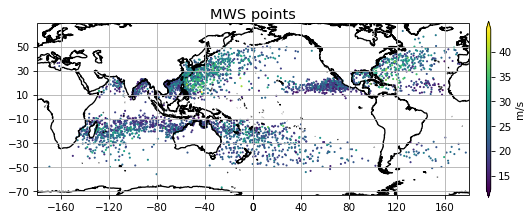

In [86]:
mapcrs = ccrs.PlateCarree(central_longitude=180)
datacrs = ccrs.PlateCarree()
fig = plt.figure(figsize=(7, 4), layout="constrained", facecolor='white', dpi=75)
ax1 = fig.add_subplot(111, projection=mapcrs)
xticks = np.arange(-180, 181, 40)
yticks = np.arange(-90+20,   91-20, 20)
ax1.set_xticks(xticks, crs=ccrs.PlateCarree())
ax1.set_yticks(yticks, crs=ccrs.PlateCarree())
# ax1.set_extent([minlon, maxlon, minlat, maxlat], ccrs.PlateCarree())
ax1.add_feature(cfeature.COASTLINE.with_scale('50m'),edgecolor='k',lw=1.25)
ax1.add_feature(cfeature.OCEAN.with_scale('50m'),facecolor='none')
ax1.grid(True)
lon = df_max['lon'];lat = df_max['lat'].values;cvalues = df_max['wind'].values
cf = ax1.scatter(lon, lat,c= cvalues,transform=datacrs,s=1,
                 # levels=count_range,cmap=mycmap
                )
cb = plt.colorbar(cf,orientation='vertical',shrink=0.6, extend = 'both',pad=0.04,aspect=40,label='m/s')
ax1.set_title('MWS points',fontsize=14, pad=5)
ax1.set_xlabel(''); ax1.set_ylabel('')
plt.show()

Text(0.5, 1.0, 'TC count according to category [ERA5] 1980 - 2024')

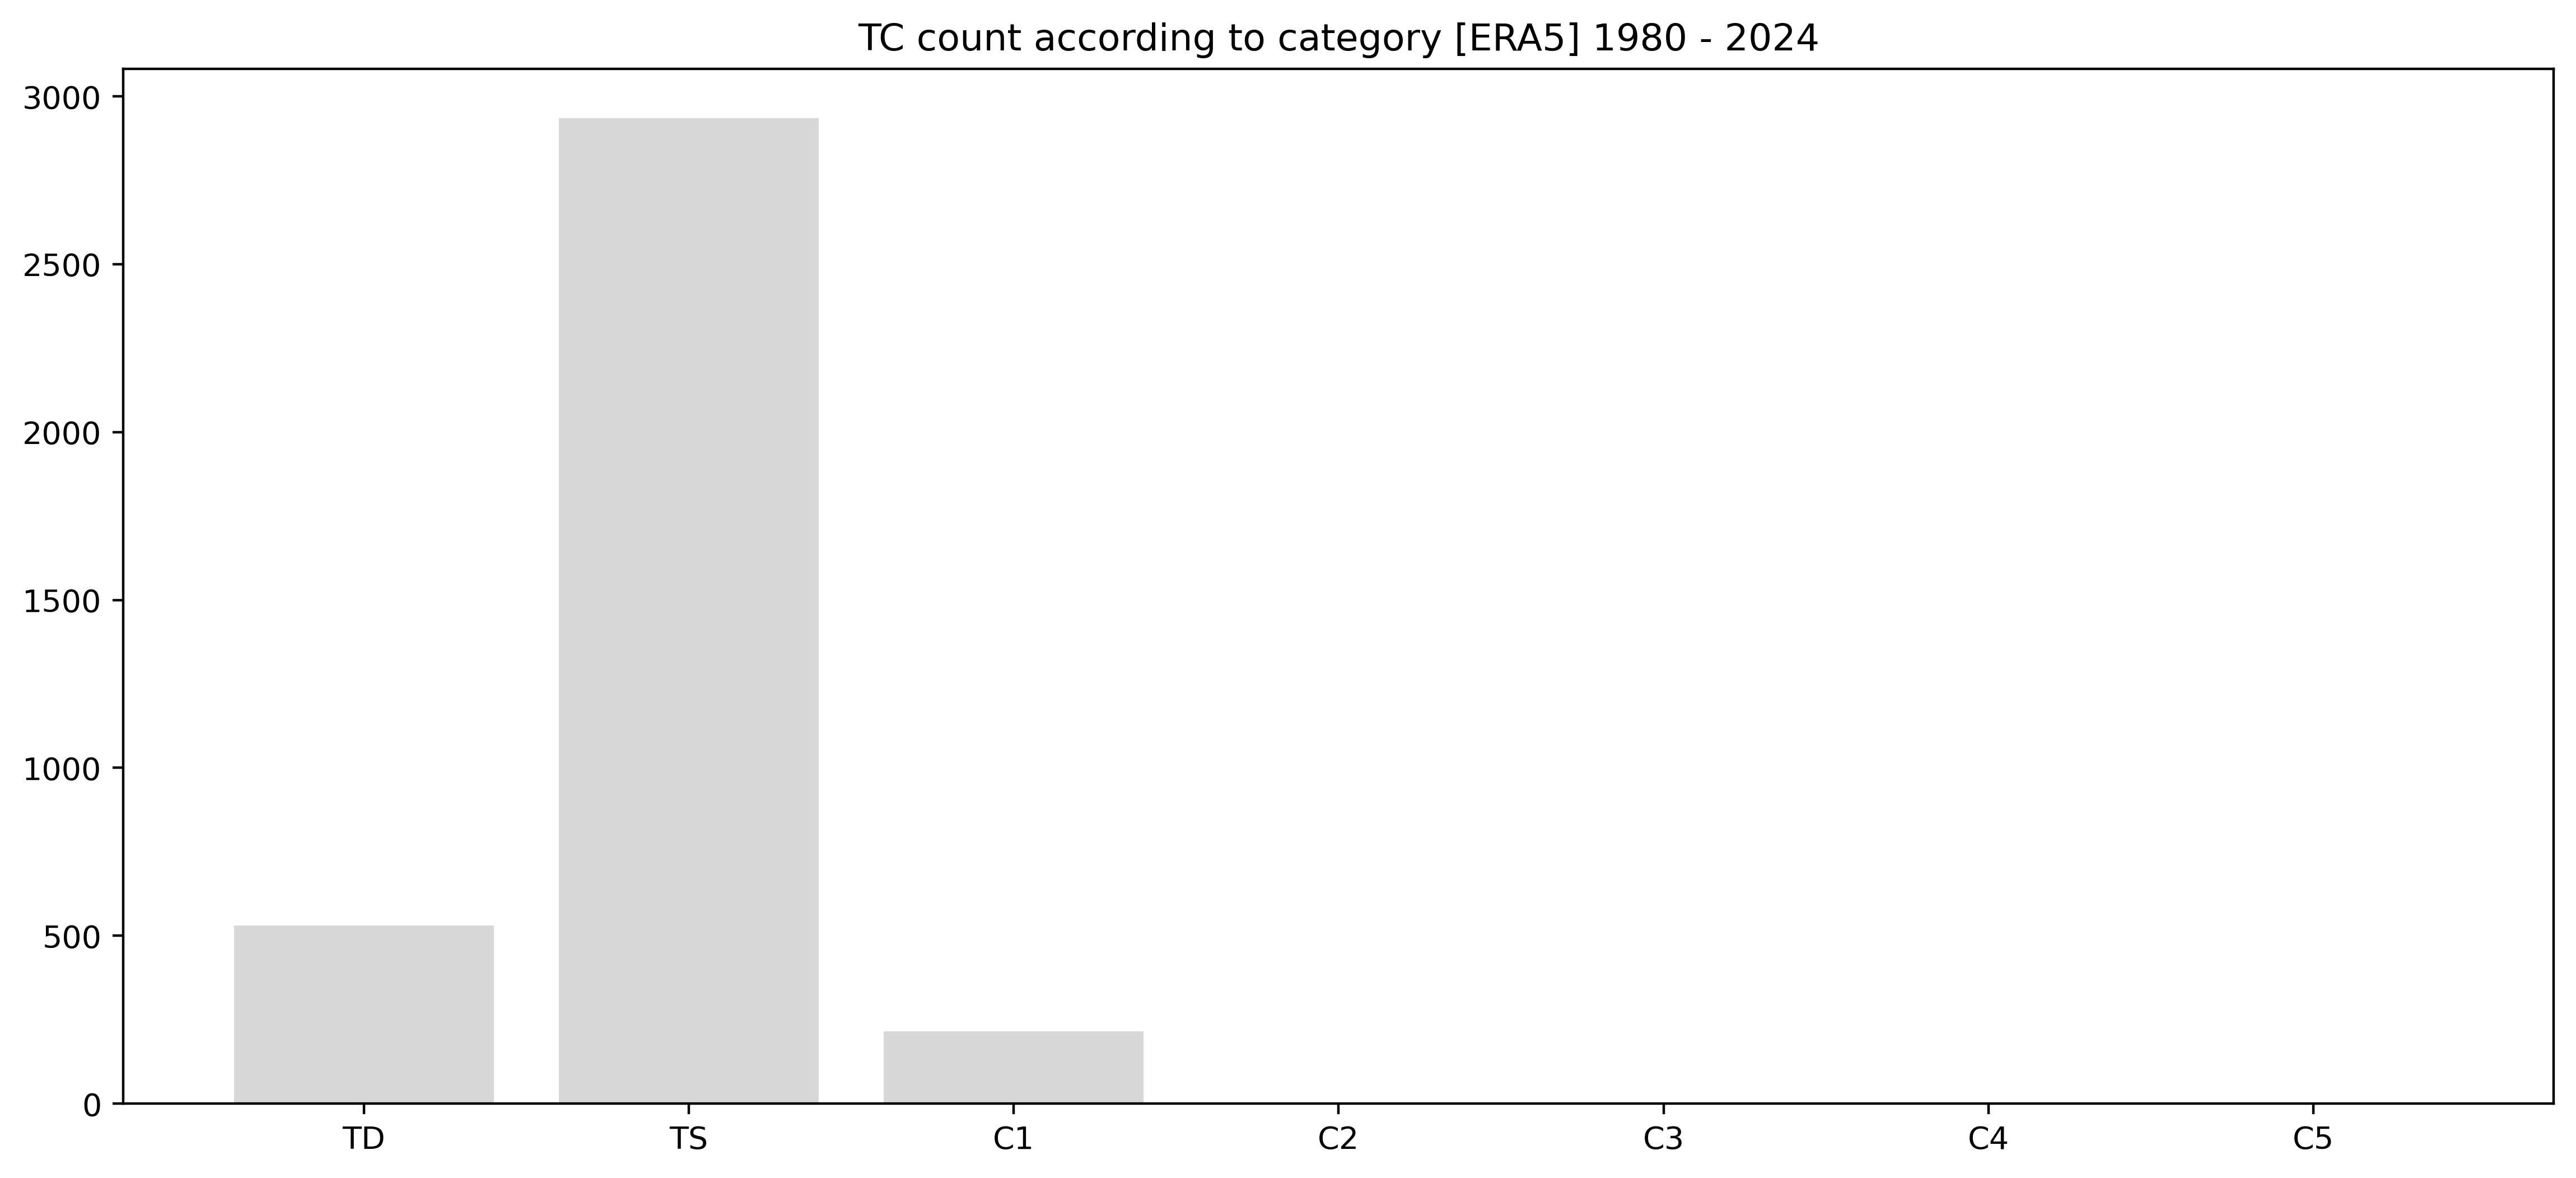

In [107]:
labels=['TD','TS','C1','C2','C3','C4','C5']
count = df_max.groupby('category')['track_id'].count()
fig=plt.figure(figsize=(14,6),dpi=400)
ax=fig.add_subplot(1,1,1, )
ax.bar(labels, count, alpha=0.3, color='gray', )
plt.title('TC count according to category [ERA5] 1980 - 2024')

In [ ]:
plt.bar(,(yearly_counts.values))
plt.xlabel('Month')
plt.ylabel('Counts')
plt.title(f'global seasonal cycle of TC count yearly {start_year} - {end_year} ')
plt.grid(axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
plt.show()

Text(0.5, 0, 'MSLP (hPa)')

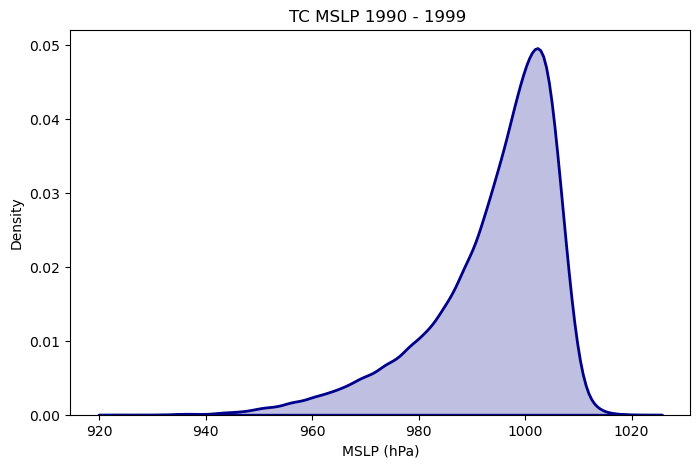

In [112]:
plt.figure(figsize=(8,5))
sns.kdeplot(dftc['msl']/100, fill=True, linewidth=2, color='darkblue')
plt.title(f'TC MSLP {start_year} - {end_year} ')
plt.xlabel('MSLP (hPa)')

Text(0.5, 0, 'wind speed (m/s)')

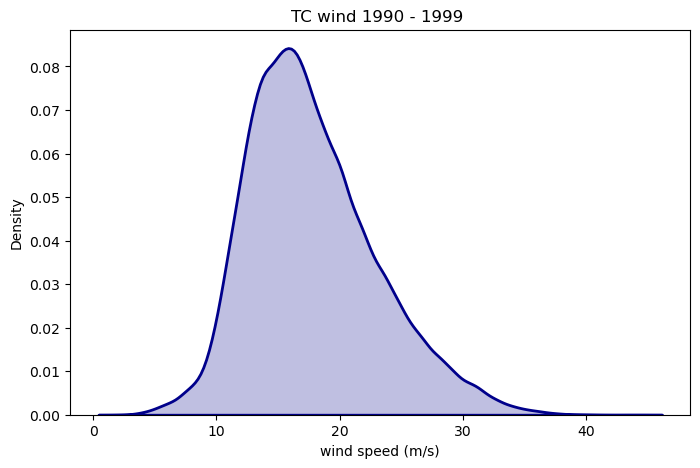

In [110]:
plt.figure(figsize=(8,5))
sns.kdeplot(dftc['wind'], fill=True, linewidth=2, color='darkblue')
plt.title(f'TC wind {start_year} - {end_year} ')
plt.xlabel('wind speed (m/s)')

Text(0, 0.5, 'mslp (hPa)')

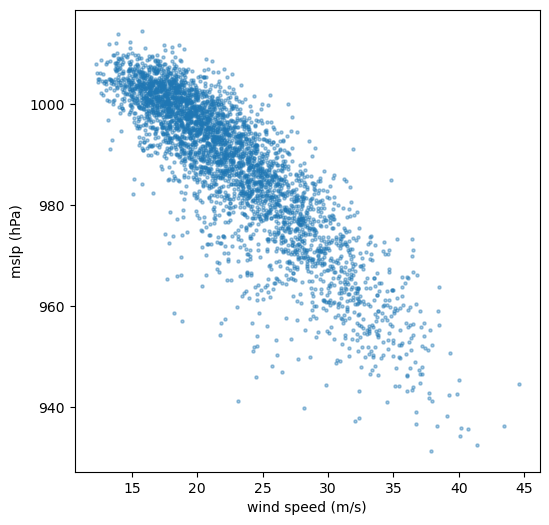

In [137]:
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
x=df_max['wind'];y=df_max['msl']/100
cf = ax.scatter(x,y, s=5,alpha=0.4)
ax.set_xlabel('wind speed (m/s)');ax.set_ylabel('mslp (hPa)')

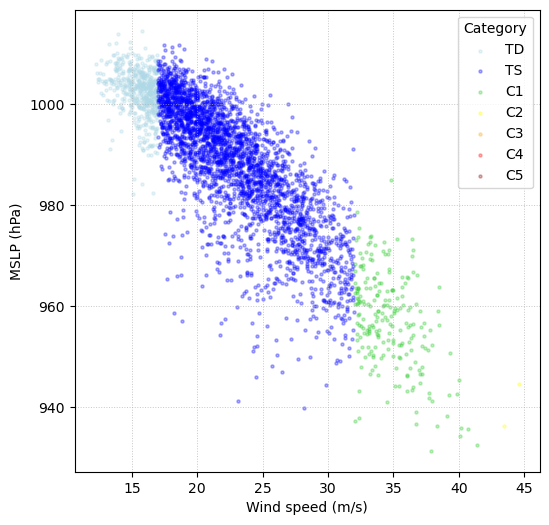

In [136]:
colors = {
    'TD': 'lightblue',
    'TS': 'blue',
    'C1': 'limegreen',
    'C2': 'yellow',
    'C3': 'orange',
    'C4': 'red',
    'C5': 'darkred'
}
fig = plt.figure(figsize=(6,6))
ax = fig.add_subplot(1,1,1)
for cat, group in df_max.groupby('category'):
    ax.scatter(group['wind'],group['msl']/100,
              s=5,alpha=0.3,color=colors.get(cat,'gray'),
               label=cat
              )
ax.set_xlabel('Wind speed (m/s)')
ax.set_ylabel('MSLP (hPa)')
ax.legend(title='Category')
ax.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example DataFrame
df = pd.DataFrame({'latitude': np.random.uniform(-30, 30, 1000)})

# Step 1: Define latitude bands (e.g. 5° bands)
df['lat_band'] = pd.cut(df['latitude'], bins=np.arange(-30, 35, 5))

# Step 2: Count number of points per band
counts = df['lat_band'].value_counts().sort_index()

# Step 3: Get band midpoints for x-axis
lat_bins = np.arange(-30, 35, 5)
lat_centers = (lat_bins[:-1] + lat_bins[1:]) / 2

# Plot
plt.figure(figsize=(7,5), dpi=400)
plt.bar(lat_centers, counts.values, width=5, edgecolor='black', color='skyblue')
plt.xlabel('Latitude (°)')
plt.ylabel('Track Point Count')
plt.title('Cyclone Track Point Density by Latitude Band')
plt.grid(axis='y', linestyle=':', linewidth=0.7, alpha=0.7)
plt.show()


Text(0.5, 1.0, 'Cyclone Track maximum count by Latitude Band')

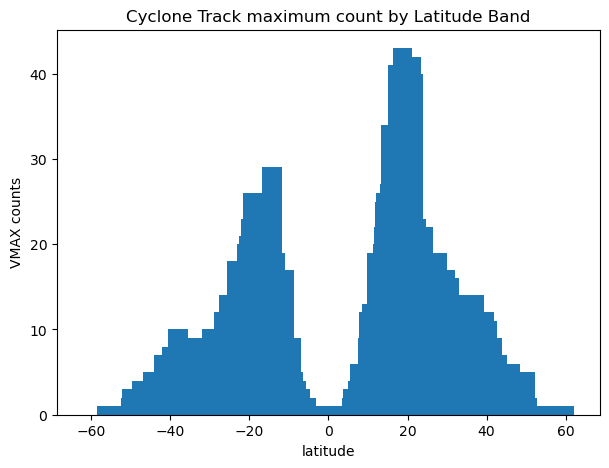

In [153]:
df_max['lat_band'] = pd.cut(df_max['lat'],bins=np.arange(-60,60,0.1))
# counts = df_max['lat_band'].value_counts().sort_index()
counts = df_max.groupby('lat_band').size()
lat_bins = np.arange(-60,60,0.1)
lat_centers = (lat_bins[:-1]+lat_bins[1:])/2
fig = plt.figure(figsize=(7,5))
ax = fig.add_subplot(1,1,1)
ax.bar(lat_centers,counts.values,width=5,)
ax.set_xlabel('latitude');ax.set_ylabel('VMAX counts')
plt.title('Cyclone Track maximum count by Latitude Band')

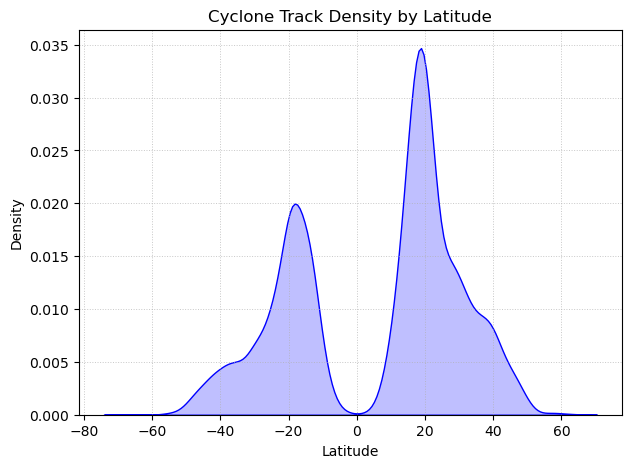

In [155]:
plt.figure(figsize=(7,5))
sns.kdeplot(df_max['lat'], fill=True, bw_adjust=0.5, color='blue')
plt.xlabel('Latitude')
plt.ylabel('Density')
plt.title('Cyclone maximum intensity location Density by Latitude [ERA5] 1980 - 2024')
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)
plt.show()

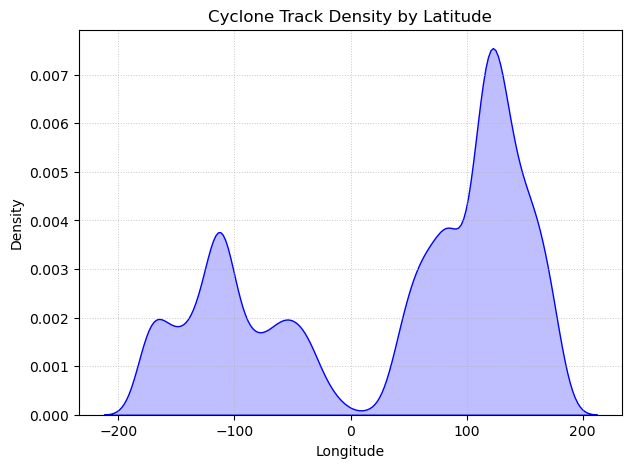

In [157]:
plt.figure(figsize=(7,5))
sns.kdeplot(df_max['lon'], fill=True, bw_adjust=0.5, color='blue')
plt.xlabel('Longitude')
plt.ylabel('Density')
plt.title('Cyclone Track Density by Latitude')
plt.grid(True, linestyle=':', linewidth=0.7, alpha=0.7)
plt.show()